In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from random import random
from dateutil import parser
%matplotlib inline
sns.set_style('white')

In [2]:
mp = pd.read_csv('Monkeypox.csv')
mp.head()

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_location,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Country_ISO3
0,1.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,29/04/2022,06/05/2022,rash,...,Lagos and Delta States,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,18/05/2022,18/05/2022,NaN,GBR
1,2.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,05/05/2022,12/05/2022,rash,...,NaN,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,18/05/2022,18/05/2022,NaN,GBR
2,3.0,confirmed,London,London,England,NaN,NaN,30/04/2022,13/05/2022,vesicular rash,...,NaN,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,18/05/2022,18/05/2022,NaN,GBR
3,4.0,confirmed,London,London,England,NaN,male,NaN,15/05/2022,vesicular rash,...,NaN,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,18/05/2022,18/05/2022,NaN,GBR
4,5.0,confirmed,London,London,England,NaN,male,NaN,15/05/2022,vesicular rash,...,NaN,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,18/05/2022,18/05/2022,NaN,GBR


In [3]:
print(f'columns = {mp.columns}')
print()
print(f'shape = {mp.shape}')
print()
print(f'info = {mp.info()}')

columns = Index(['ID', 'Status', 'Location', 'City', 'Country', 'Age', 'Gender',
       'Date_onset', 'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)',
       'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation',
       'Outcome', 'Contact_comment', 'Contact_ID', 'Contact_location',
       'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Date_entry', 'Date_last_modified', 'Source_III',
       'Country_ISO3'],
      dtype='object')

shape = (1133, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1132 non-null   float64
 1   Status                   1132 non-null   object 
 2   Location                 476 no

In [4]:
mp.isna().sum()

ID                            1
Status                        1
Location                    657
City                        762
Country                       1
Age                         965
Gender                      814
Date_onset                 1125
Date_confirmation           213
Symptoms                   1022
Hospitalised (Y/N/NA)      1001
Date_hospitalisation       1120
Isolated (Y/N/NA)           992
Date_isolation             1122
Outcome                    1132
Contact_comment            1097
Contact_ID                 1126
Contact_location           1129
Travel_history (Y/N/NA)    1004
Travel_history_entry       1121
Travel_history_start       1129
Travel_history_location    1106
Travel_history_country     1100
Genomics_Metadata          1110
Confirmation_method        1045
Source                        1
Source_II                   804
Date_entry                    2
Date_last_modified            2
Source_III                 1091
Country_ISO3                  0
dtype: i

In [5]:
# Cases By Countries
country_cases = mp.Country.value_counts()
country_cases[:10]

Spain            327
England          214
Portugal         143
Canada            97
Germany           66
France            51
Netherlands       40
Italy             29
United States     28
Belgium           17
Name: Country, dtype: int64

## Country by cases of monkey pox

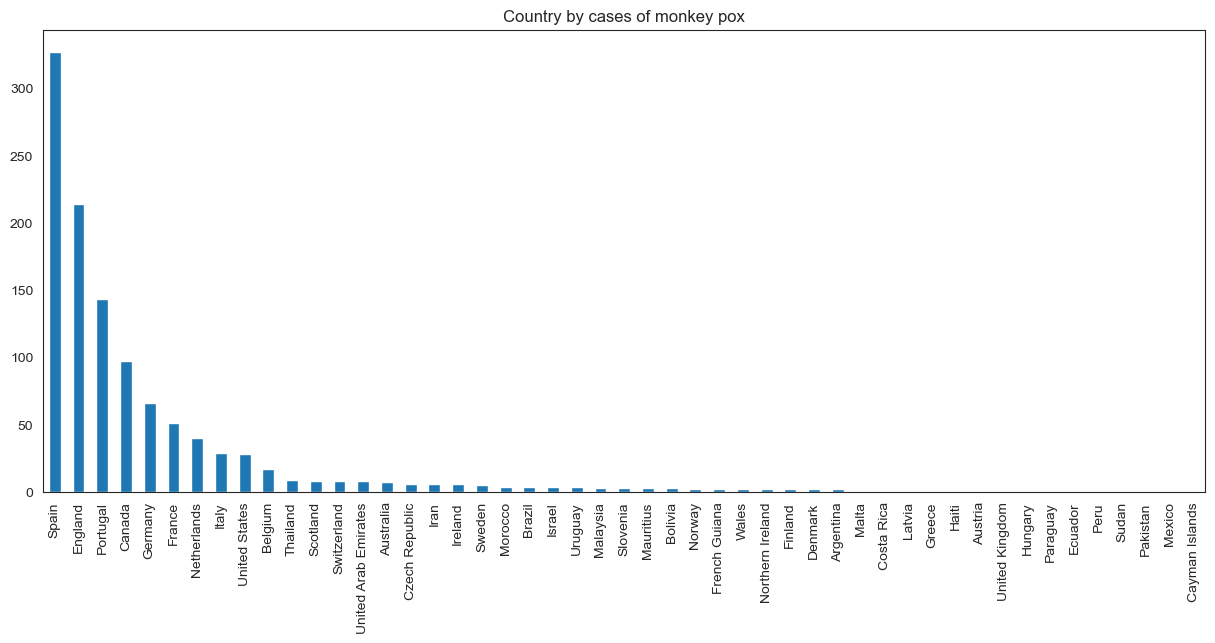

In [6]:
fig,ax = plt.subplots(figsize = (15, 6))
country_cases.plot(kind = 'bar'),
ax.set(title = 'Country by cases of monkey pox');

In [7]:
sym = mp.Symptoms.value_counts().to_frame().reset_index().rename({'index' :'symptoms', 'Symptoms': 'count'},axis = 1).reset_index(drop = True)
sym[:10]

,symptoms,count
0,genital ulcer lesions,30
1,oral and genital ulcers; fever,17
2,ulcerative lesions,16
3,skin lesions; ulcerative lesions,5
4,genital ulcers,5
5,vesicular rash,5
6,skin lesions,4
7,rash,2
8,skin rashes,2
9,fever; skin lesions,2


## Classes of Symptoms

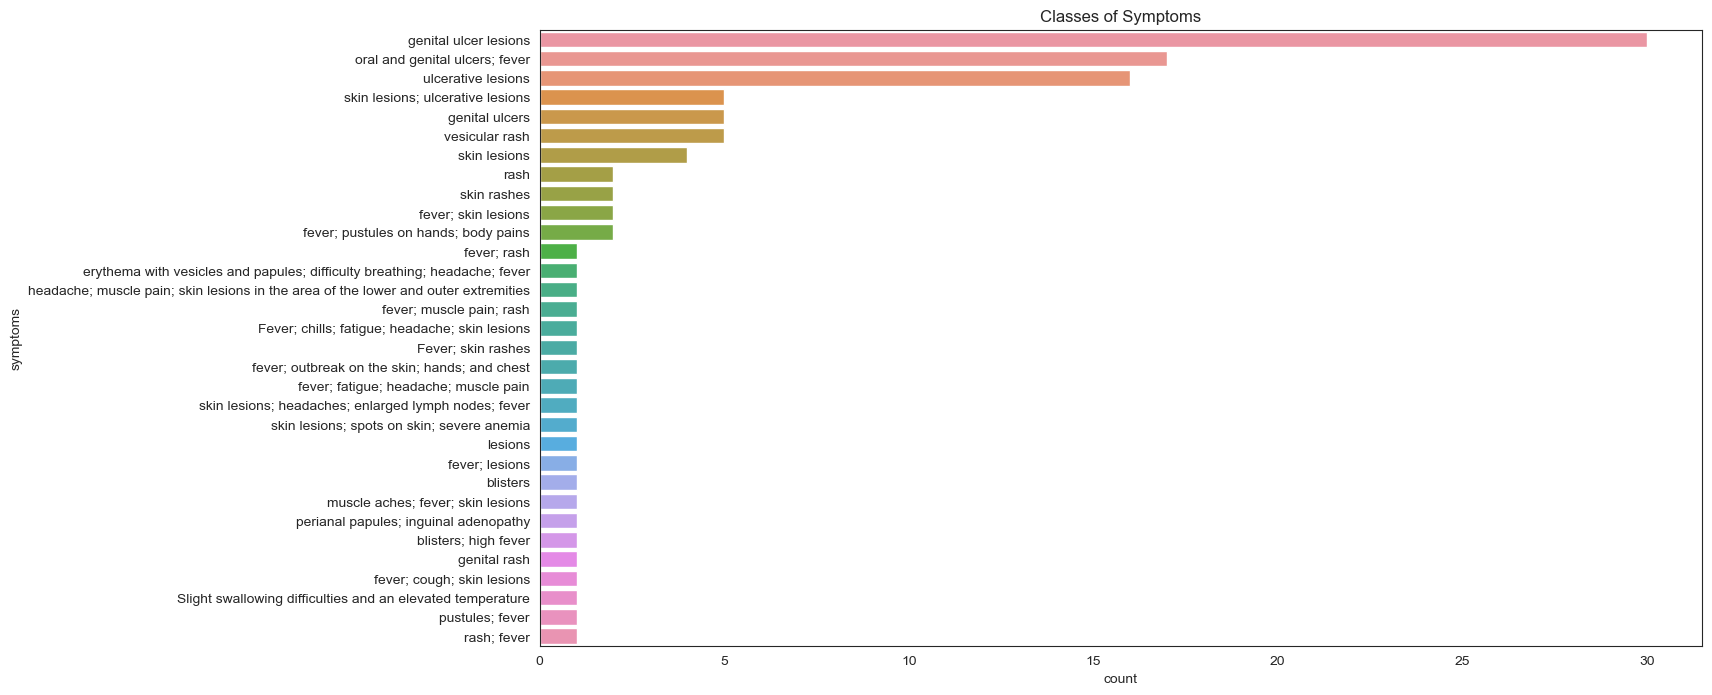

In [8]:
fig,ax = plt.subplots(figsize = (15, 8))
sns.barplot(data = sym, y= sym['symptoms'] , x = sym['count'])
ax.set(title = 'Classes of Symptoms');

In [10]:
ag_gen = mp.Age.dropna().value_counts()
ag_gen[:10]

20-64    60
20-44    34
30-59    17
30-34     9
25-29     8
20-24     7
30-39     5
35-39     5
40-44     3
50-59     3
Name: Age, dtype: int64

## Age group mostly affected

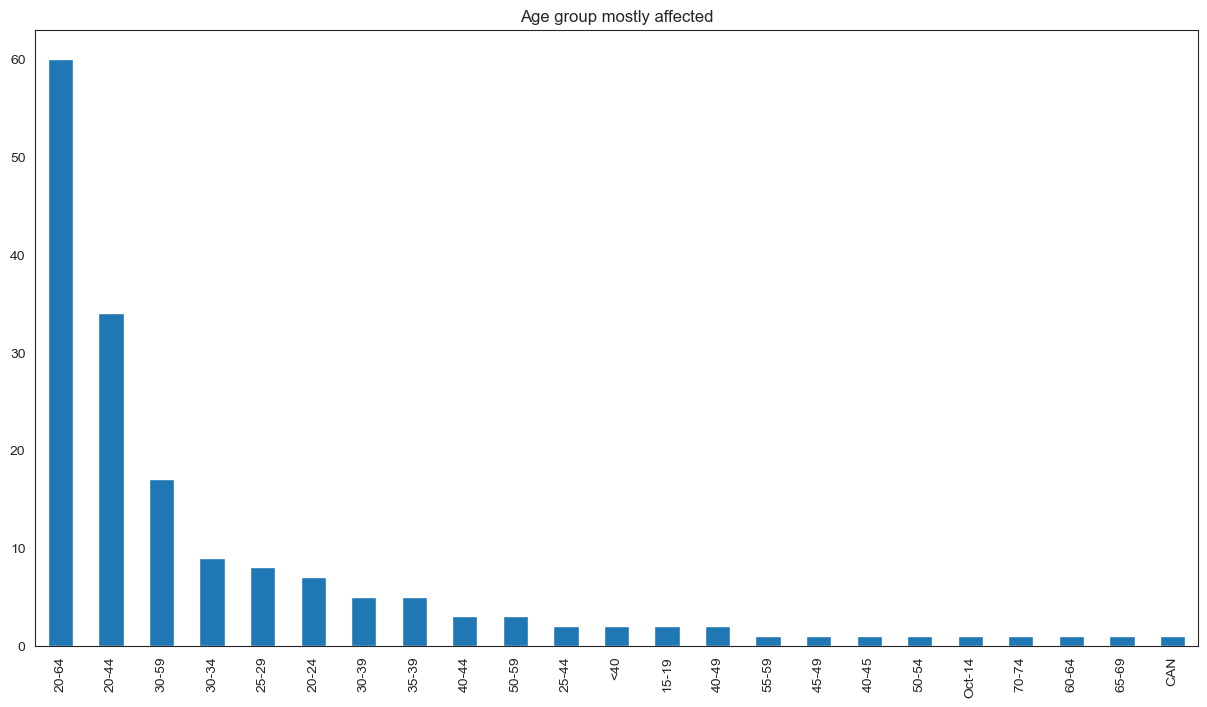

In [11]:
fig,ax = plt.subplots(figsize = (15, 8))
ag_gen.plot(kind = 'bar')
ax.set(title = 'Age group mostly affected');

## Cases by Gender

In [12]:
mp.Gender.value_counts()

male      308
female      8
Male        2
male        1
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

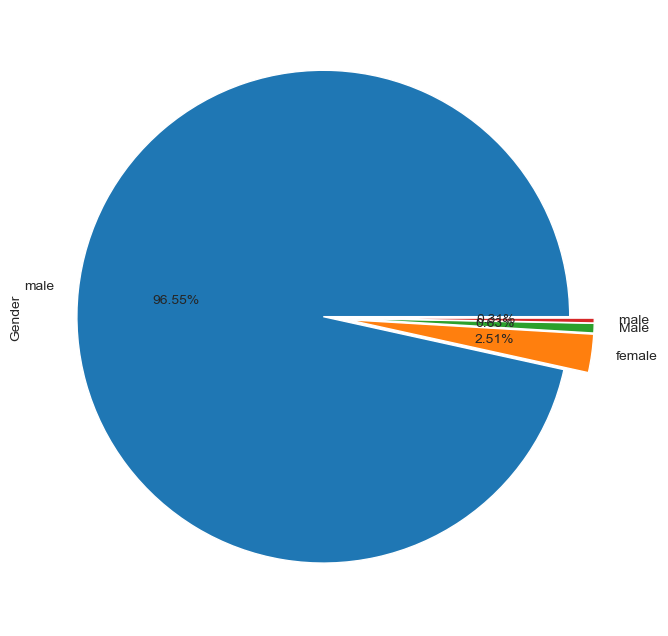

In [13]:
fig,ax = plt.subplots(figsize = (8, 8))
mp.Gender.value_counts().plot(kind ='pie', explode = [0.05,0.05,0.05,0.05], autopct='%.2f%%')

<Axes: ylabel='Gender'>

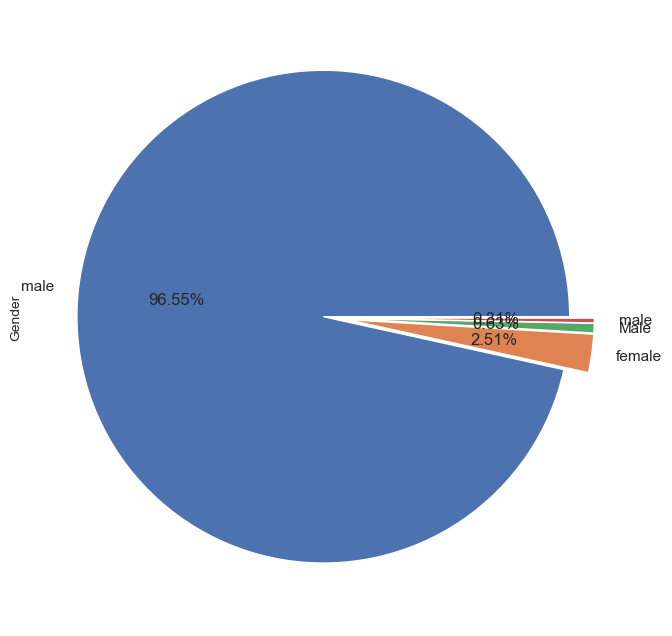

In [14]:
fig,ax = plt.subplots(figsize = (8, 8))
sns.set()
mp.Gender.value_counts().plot(kind = 'pie',explode = [0.05,0.05,0.05,0.05], autopct='%.2f%%')

In [15]:
mp.loc[:, ['Travel_history_location','Travel_history_country']].dropna()

,Travel_history_location,Travel_history_country
0,Lagos and Delta States,Nigeria
6,London,England
67,Canary Islands,Spain
99,Lisbon,Portugal
107,London,England
195,Canary Islands,Spain
261,Canary Islands,Spain
263,Antwerp,Belgium
264,Canary Islands,Spain
439,Madrid;,Spain; Germany


## Average day between onset and confirmation

In [16]:
mp.loc[:, ['Date_onset', 'Date_confirmation']].dropna(how = 'any')

,Date_onset,Date_confirmation
0,29/04/2022,06/05/2022
1,05/05/2022,12/05/2022
2,30/04/2022,13/05/2022
69,29/04/2022,26/05/2022
107,09/05/2022,20/05/2022
195,15/05/2022,23/05/2022


In [18]:
# convert to datetime
mp.Date_confirmation = pd.to_datetime(mp["Date_confirmation"])
mp.Date_onset = pd.to_datetime(mp["Date_onset"])


In [19]:
mp['diffrence'] = mp.Date_confirmation -mp.Date_onset 

In [20]:
days_to_case = mp.loc[:, ['Date_onset', 'Date_confirmation', 'diffrence']].dropna(how = 'any')
days_to_case

,Date_onset,Date_confirmation,diffrence
0,2022-04-29,2022-06-05,37 days
1,2022-05-05,2022-12-05,214 days
2,2022-04-30,2022-05-13,13 days
69,2022-04-29,2022-05-26,27 days
107,2022-09-05,2022-05-20,-108 days
195,2022-05-15,2022-05-23,8 days


In [21]:
#@ Average of 12 days from detection to confirmation
days_to_case.diffrence.mean()

Timedelta('31 days 20:00:00')